<a href="https://www.kaggle.com/code/yomritoyj06/pca-scikit-learn?scriptVersionId=188438303" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style = "color: blue "> Importing the MNIST digit data </h1>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
35803,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16049,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36122,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34692,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33152,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h1 style = "color: blue "> Getting dependent and independent variables </h1>

In [5]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

<h1 style = "color: blue "> Train test splitting </h1>

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

<h1 style = "color: blue "> Using KNN algorithm without PCA </h1>

In [7]:
from sklearn.neighbors import KNeighborsClassifier
clf1 = KNeighborsClassifier()

In [8]:
clf1.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
import time
start = time.time()
y_pred1 = clf1.predict(X_test)
print(time.time()-start)

11.656893968582153


<h1 style = "color: blue "> Calculation accuracy </h1>

In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred1))

0.9671428571428572


<h1 style = "color: blue "> Importing and intilializing PCA class from scikit-learn </h1>

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)

<h1 style = "color: blue "> Scaling the data before performing PCA </h1>

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [14]:
X_test_trf.shape

(8400, 784)

In [15]:
clf1.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [16]:
y_pred2 = clf1.predict(X_test_trf)

In [17]:
print(accuracy_score(y_test, y_pred2))

0.9416666666666667


In [18]:
# ls = []
# for i in range(1, 785):
#     pca_i = PCA(n_components = i)
    
#     X_train_trf = pca_i.fit_transform(X_train)
#     X_test_trf = pca_i.transform(X_test)
    
#     clf = KNeighborsClassifier()
    
#     clf.fit(X_train_trf,y_train)
    
#     y_pred = clf.predict(X_test_trf)
    
#     ls.append(accuracy_score(y_test, y_pred))

<h2 style = "color: blue "> Explained variance outputs the eigen value of each of the eigen vectors (PCs), i.e. how much variance is explained by a particular eigen vector (PC) </h2>

In [19]:
pca.explained_variance_

array([4.07559753e+01, 2.90881141e+01, 2.66660916e+01, 2.09128722e+01,
       1.80572397e+01, 1.58357705e+01, 1.38258813e+01, 1.24869428e+01,
       1.11044760e+01, 1.00776651e+01, 9.65181567e+00, 8.63606768e+00,
       8.10004387e+00, 7.89367879e+00, 7.42672976e+00, 7.18976776e+00,
       6.73433618e+00, 6.61803533e+00, 6.40716338e+00, 6.28249858e+00,
       5.93610760e+00, 5.75143861e+00, 5.49379342e+00, 5.34259768e+00,
       5.15106245e+00, 4.94396258e+00, 4.88240847e+00, 4.71756352e+00,
       4.47279096e+00, 4.34878417e+00, 4.28758304e+00, 4.23959312e+00,
       4.07073190e+00, 4.05125470e+00, 3.98785666e+00, 3.88144568e+00,
       3.82383966e+00, 3.71573652e+00, 3.56193528e+00, 3.46537396e+00,
       3.44059005e+00, 3.36418640e+00, 3.27355597e+00, 3.24146426e+00,
       3.20532985e+00, 3.16433144e+00, 3.12910842e+00, 3.08918140e+00,
       3.05111363e+00, 3.03714760e+00, 2.98427970e+00, 2.92774979e+00,
       2.88572890e+00, 2.82686297e+00, 2.80455223e+00, 2.76490499e+00,
      

<h2 style = "color: blue "> Explained variance ratio outputs the fraction each eigen vector (PC) is able to explain out of the entire variance</h2>

In [20]:
print(pca.explained_variance_ratio_*100)

[5.77262922e+00 4.12000685e+00 3.77695438e+00 2.96207504e+00
 2.55760656e+00 2.24296023e+00 1.95828184e+00 1.76863615e+00
 1.57282515e+00 1.42738884e+00 1.36707201e+00 1.22320264e+00
 1.14728085e+00 1.11805154e+00 1.05191342e+00 1.01835039e+00
 9.53843591e-01 9.37370873e-01 9.07503214e-01 8.89845836e-01
 8.40783418e-01 8.14627115e-01 7.78134548e-01 7.56719359e-01
 7.29590530e-01 7.00257145e-01 6.91538691e-01 6.68190243e-01
 6.33520940e-01 6.15956763e-01 6.07288305e-01 6.00491068e-01
 5.76573760e-01 5.73815033e-01 5.64835407e-01 5.49763479e-01
 5.41604229e-01 5.26292624e-01 5.04508394e-01 4.90831561e-01
 4.87321197e-01 4.76499472e-01 4.63662683e-01 4.59117250e-01
 4.53999214e-01 4.48192247e-01 4.43203299e-01 4.37548083e-01
 4.32156207e-01 4.30178075e-01 4.22689926e-01 4.14683096e-01
 4.08731306e-01 4.00393603e-01 3.97233536e-01 3.91617947e-01
 3.85740793e-01 3.81946853e-01 3.68259992e-01 3.66547588e-01
 3.59678753e-01 3.52918067e-01 3.48470659e-01 3.44970520e-01
 3.42235681e-01 3.414553

In [21]:
import matplotlib.pyplot as plt
import numpy as np

<h1 style = "color: blue "> Cummulative sum over explained variance ratio gives how much variance out of 100% is explained till a particular PC </h1>

In [22]:
print(np.cumsum(pca.explained_variance_ratio_*100))

[  5.77262922   9.89263607  13.66959045  16.63166549  19.18927205
  21.43223227  23.39051412  25.15915026  26.73197541  28.15936425
  29.52643626  30.7496389   31.89691975  33.01497129  34.06688471
  35.0852351   36.03907869  36.97644957  37.88395278  38.77379862
  39.61458203  40.42920915  41.2073437   41.96406306  42.69365359
  43.39391073  44.08544942  44.75363966  45.38716061  46.00311737
  46.61040567  47.21089674  47.7874705   48.36128553  48.92612094
  49.47588442  50.01748865  50.54378127  51.04828967  51.53912123
  52.02644243  52.5029419   52.96660458  53.42572183  53.87972104
  54.32791329  54.77111659  55.20866467  55.64082088  56.07099896
  56.49368888  56.90837198  57.31710328  57.71749689  58.11473042
  58.50634837  58.89208916  59.27403602  59.64229601  60.0088436
  60.36852235  60.72144042  61.06991108  61.41488159  61.75711728
  62.09857264  62.43607685  62.7675846   63.09453789  63.41587336
  63.73543506  64.05318843  64.36679813  64.67673938  64.98157497
  65.284410

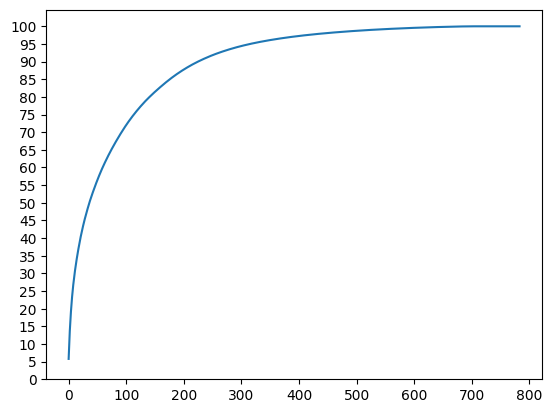

In [23]:
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.yticks(range(0, 101, 5))
plt.show()

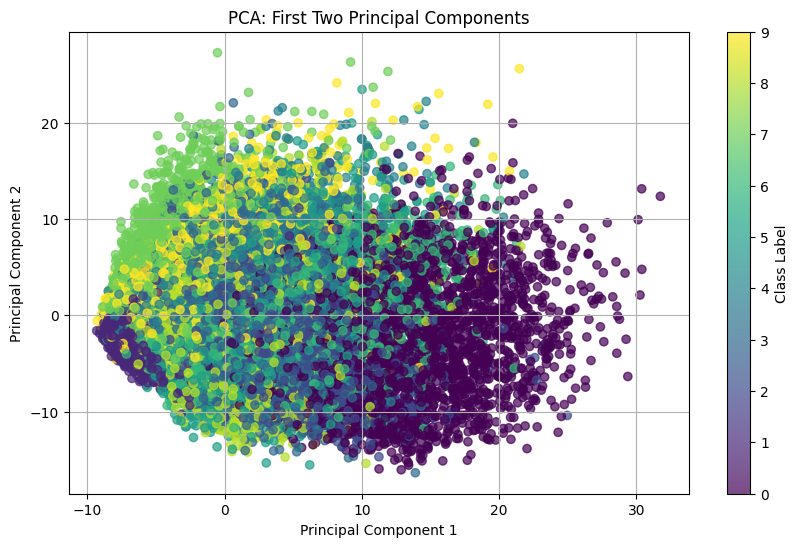

In [24]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_trf[:, 0], X_train_trf[:, 1], c = y_train, cmap='viridis', alpha = 0.7)
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Class Label')
plt.grid()
plt.show()

In [25]:
import plotly.express as px

In [26]:
fig = px.scatter_3d(
    x = X_train_trf[:, 0], 
    y = X_train_trf[:, 1], 
    z = X_train_trf[:, 2], 
    color = y_train,
    title = 'PCA: First Three Principal Components',
    labels = {'x': 'Principal Component 1', 
            'y': 'Principal Component 2', 
            'z': 'Principal Component 3'},
    color_continuous_scale='viridis'
)

fig.show()